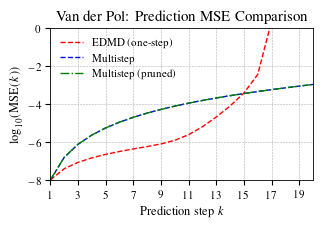

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# --- LaTeX + Times setup (Automatica-style) ---
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],                 # Times text
    # newtx gives Times-like math (better than mathptmx)
    "text.latex.preamble": r"\usepackage{newtxtext,newtxmath}",
    "axes.labelsize": 9, "font.size": 9,
    "legend.fontsize": 8, "xtick.labelsize": 8, "ytick.labelsize": 8,
    "axes.linewidth": 0.6, "lines.linewidth": 1.0, "legend.frameon": False,
    "ps.fonttype": 42, "pdf.fonttype": 42,   # embed fonts properly
})

# ---- load your data (as you already do) ----
data_multi  = np.load("vdp_multistep_edmdc_mse.npz")
mse_multi   = data_multi["mse_t_multistep"]
data_edmd   = np.load("vdp_edmdc_mse.npz")
mse_edmd    = data_edmd["mse_t_edmdc"]
data_pruned = np.load("vdp_multistep_edmdc_pruned_mse.npz")
mse_pruned  = data_pruned["mse_t_multistep_pruned"]

k = np.arange(1, len(mse_edmd) + 1)

# ---- plot: small, log10(MSE), y in [-8, 0] ----
plt.figure(figsize=(3.3, 2.2))  # ~one column width
plt.plot(k, np.log10(mse_edmd),   "r--", label="EDMD (one-step)")
plt.plot(k, np.log10(mse_multi),  "b--",  label="Multistep")
plt.plot(k, np.log10(mse_pruned), "g-.", label="Multistep (pruned)")

plt.xlabel(r"Prediction step $k$")
plt.ylabel(r"$\log_{10}(\mathrm{MSE}(k))$")
plt.ylim(-8, 0)
plt.xlim(1, k.max())
plt.xticks(np.arange(1, k.max()+1, 2))
plt.grid(True, linestyle="--", linewidth=0.4)
plt.legend()
plt.tight_layout()

# Save as EPS (vector, Times embedded)
plt.title("Van der Pol: Prediction MSE Comparison")
plt.savefig("Figures/vdp_log_mse.eps", format="eps", bbox_inches="tight", dpi=300)
plt.show()

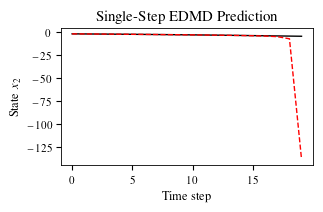

<Figure size 640x480 with 0 Axes>

In [2]:
#plot bad trajectories
data = np.load("vdp_edmdc_traj_6159.npz")
Y_true = data["Y_true"]
Y_pred = data["Y_pred"]
time_steps = np.arange(Y_true.shape[0])
plt.figure(figsize=(3.3, 2.2))
plt.plot(time_steps, Y_true[:, 1], "k-", label="True")
plt.plot(time_steps, Y_pred[:, 1], "r--", label="Predicted")
plt.xlabel("Time step")
plt.ylabel("State $x_2$")
plt.title("Single-Step EDMD Prediction")
plt.tight_layout()
plt.show()
plt.savefig("Figures/vdp_traj_6159.eps", format="eps", bbox_inches="tight", dpi=300)

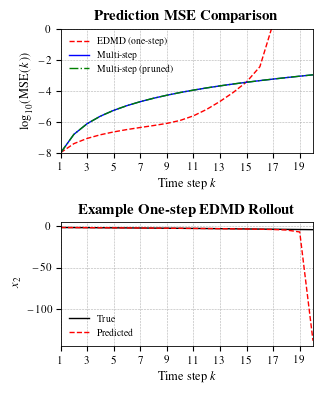

In [56]:
# ---- load data ----
data_multi  = np.load("vdp_multistep_edmdc_mse.npz")
mse_multi   = data_multi["mse_t_multistep"]
data_edmd   = np.load("vdp_edmdc_mse.npz")
mse_edmd    = data_edmd["mse_t_edmdc"]
data_pruned = np.load("vdp_multistep_edmdc_pruned_mse.npz")
mse_pruned  = data_pruned["mse_t_multistep_pruned"]
data_bad    = np.load("vdp_edmdc_traj_6159.npz")
Y_true      = data_bad["Y_true"]
Y_pred      = data_bad["Y_pred"]

k = np.arange(1, len(mse_edmd) + 1)
time_steps = np.arange(Y_true.shape[0])

# ---- figure setup ----
fig, axs = plt.subplots(2, 1, figsize=(3.3, 4.0), sharex=False)
plt.subplots_adjust(hspace=0.35)

# ---- top: log MSE ----
axs[0].plot(k, np.log10(mse_edmd), "r--", lw=1.0, label="EDMD (one-step)")
axs[0].plot(k, np.log10(mse_multi), "b-", lw=1.0, label="Multi-step")
axs[0].plot(k, np.log10(mse_pruned), "g-.", lw=1.0, label="Multi-step (pruned)")
axs[0].set_ylim(-8, 0)
axs[0].set_xlim(1, k.max())
axs[0].set_xticks(np.arange(1, k.max()+1, 2))
axs[0].grid(True, linestyle="--", linewidth=0.4)
axs[0].set_xlabel(r"Time step $k$")
axs[0].set_ylabel(r"$\log_{10}(\mathrm{MSE}(k))$")
axs[0].legend(frameon=False, fontsize=7, loc="upper left")
axs[0].set_title(r"\textbf{Prediction MSE Comparison}", pad=6)

# ---- bottom: bad trajectory ----
axs[1].plot(k, Y_true[:, 1], "k-", lw=1.0, label="True")
axs[1].plot(k, Y_pred[:, 1], "r--", lw=1.0, label="Predicted")
axs[1].set_xlim(1, k.max())
axs[1].set_xticks(np.arange(1, k.max()+1, 2))
axs[1].grid(True, linestyle="--", linewidth=0.4)
axs[1].set_xlabel(r"Time step $k$")
axs[1].set_ylabel(r"$x_2$")
axs[1].legend(frameon=False, fontsize=7, loc="lower left")
axs[1].set_title(r"\textbf{Example One-step EDMD Rollout}", pad=6)

# ---- save ----
plt.tight_layout()
plt.savefig("Figures/vdp_mse_and_traj.eps", format="eps", bbox_inches="tight", dpi=300)
plt.show()

In [6]:
#plot closed loop phase portraits
data_cl = np.load("vdp_mpc_trajectory.npz")
trajectory = data_cl["trajectory"]
data_cl_pruned = np.load("vdp_mpc_pruned_trajectory.npz")
trajectory_pruned = data_cl_pruned["trajectory"]
print(trajectory.shape)

(10001, 1, 2)


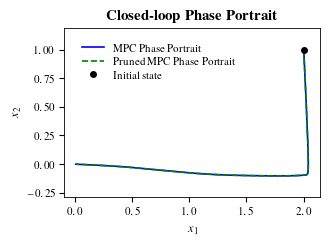

In [7]:

plt.figure(figsize=(3.3, 2.2))  # compact Automatica width

# Phase portraits
plt.plot(trajectory[:, 0, 0], trajectory[:, 0, 1], 'b-', lw=1.2, label='MPC Phase Portrait')
plt.plot(trajectory_pruned[:, 0, 0], trajectory_pruned[:, 0, 1], 'g--', lw=1.2, label='Pruned MPC Phase Portrait')

# Mark initial point
plt.plot(trajectory[0, 0, 0], trajectory[0, 0, 1], 'ko', markersize=4, label='Initial state')

# Labels & style
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"\textbf{Closed-loop Phase Portrait}", pad=6)
plt.axis("equal")

# Legend inside top-left (fine-tuned placement)
plt.legend(
    loc='upper left',
    bbox_to_anchor=(0.03, 0.97),
    frameon=False,
    handlelength=2,
    labelspacing=0.3,
)

plt.savefig("Figures/vdp_mpc_phase_portrait.eps", format="eps", bbox_inches="tight", dpi=300)
plt.show()

In [8]:
pruned_control = np.load("vdp_mpc_pruned_u_history.npz")["u_history"]
control = np.load("vdp_mpc_u_history.npz")["u_history"]
print(control.shape)
print

(10000, 1)


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

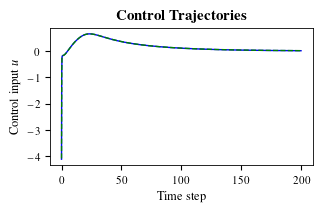

In [9]:
# plot control actions
plt.figure(figsize=(3.3, 2.2))
time_steps = np.linspace(0, 0.02 * control.shape[0] ,control.shape[0])
plt.plot(time_steps, control, "b-", label="MPC Control")
plt.plot(time_steps, pruned_control, "g--", label="Pruned MPC Control")
plt.xlabel("Time step")
plt.ylabel("Control input $u$")
plt.title(r"\textbf{Control Trajectories}", pad=6)
plt.tight_layout()
plt.savefig("Figures/vdp_mpc_control_actions.eps", format="eps", bbox_inches="tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


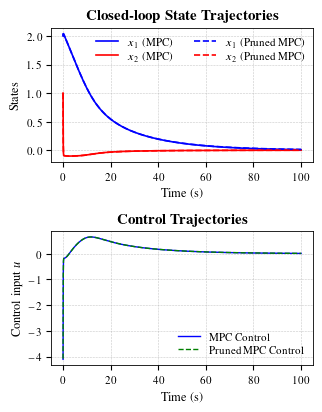

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(3.3, 4.2), sharex=False)
plt.subplots_adjust(hspace=0.35)  # controls vertical gap
time_steps = np.linspace(0, 0.01 * control.shape[0] ,control.shape[0])
# ---- (a) state trajectories ----
axs[0].plot(time_steps, trajectory[:-1, 0, 0], 'b-', lw=1.2, label=r'$x_1$ (MPC)')
axs[0].plot(time_steps, trajectory[:-1, 0, 1], 'r-', lw=1.2, label=r'$x_2$ (MPC)')

axs[0].plot(time_steps, trajectory_pruned[:-1, 0, 0], 'b--', lw=1.2, label=r'$x_1$ (Pruned MPC)')
axs[0].plot(time_steps, trajectory_pruned[:-1, 0, 1], 'r--', lw=1.2, label=r'$x_2$ (Pruned MPC)')
axs[0].set_title(r'\textbf{Closed-loop State Trajectories}', pad=6)
axs[0].set_xlabel(r'Time (s)')
axs[0].set_ylabel(r'States')
axs[0].grid(True, linestyle='--', linewidth=0.4, alpha=0.7)

axs[0].legend(
    loc='upper right',
    frameon=False,
    handlelength=2,
    labelspacing=0.3,
    ncol=2
)

# ---- (b) control trajectories ----
axs[1].plot(time_steps, control, "b-", label="MPC Control")
axs[1].plot(time_steps, pruned_control, "g--", label="Pruned MPC Control")
axs[1].set_title(r'\textbf{Control Trajectories}', pad=6)
axs[1].set_xlabel(r'Time (s)')
axs[1].set_ylabel(r'Control input $u$')
axs[1].grid(True, linestyle='--', linewidth=0.4, alpha=0.7)
axs[1].legend(loc='lower right', frameon=False, handlelength=2, labelspacing=0.3)

plt.tight_layout()
plt.savefig('Figures/vdp_closedloop2.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


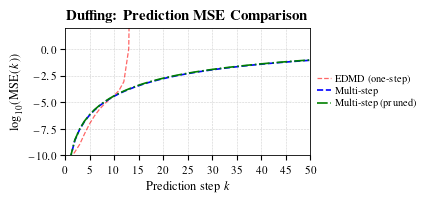

In [60]:
# ---- load your data (as you already do) ----
data_multi  = np.load("duffing_multistep_edmdc_mse.npz")
mse_multi   = data_multi["mse_t_multistep"]
data_edmd   = np.load("duffing_edmdc_mse.npz")
mse_edmd    = data_edmd["mse_t_edmdc"]
data_pruned = np.load("duffing_multistep_edmdc_pruned_mse.npz")
mse_pruned  = data_pruned["mse_t_multistep_pruned"]

k = np.arange(1, len(mse_edmd) + 1)

# ---- plot: small, log10(MSE), y in [-10, 2] ----
fig, ax = plt.subplots(figsize=(4.3,2.1))  # one-column width
ax.set_title(r"\textbf{Duffing: Prediction MSE Comparison}", pad=6)
ax.plot(k, np.log10(mse_edmd),   "r--",  lw=0.9, alpha=0.6,
        label="EDMD (one-step)")
ax.plot(k, np.log10(mse_multi),  "b--",  lw=1.2,
        label="Multi-step")
ax.plot(k, np.log10(mse_pruned), "g-.",  lw=1.2,
        label="Multi-step (pruned)")

ax.set_xlabel(r"Prediction step $k$")
ax.set_ylabel(r"$\log_{10}(\mathrm{MSE}(k))$")
ax.set_ylim(-10, 2)
ax.set_xlim(1, k.max())
ax.set_xticks(np.arange(0, k.max()+1, 5))
ax.grid(True, linestyle="--", linewidth=0.4, alpha=0.6)

# ---- legend outside (right) ----
ax.legend(
    loc="center left",
    bbox_to_anchor=(1.01, 0.5),
    frameon=False,
    fontsize=7.5,
    handlelength=1.4,
    handletextpad=0.4,
    labelspacing=0.25,
    borderaxespad=0.0
)

plt.tight_layout()
plt.savefig("Figures/duffing_log_mse.eps",
            format="eps", bbox_inches="tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


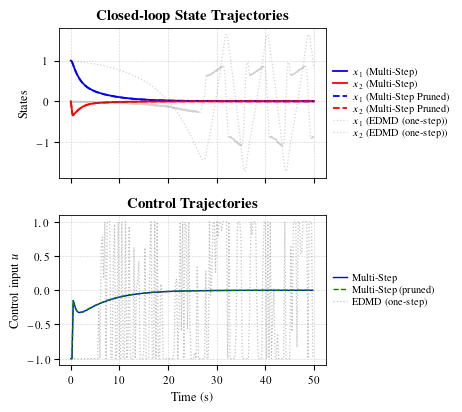

In [59]:
#do the same for duffing closed loop
# load trajectories
data_cl = np.load("duffing_mpc_trajectory.npz")
trajectory = data_cl["trajectory"]
data_cl_pruned = np.load("duffing_mpc_trajectory_pruned.npz")
trajectory_pruned = data_cl_pruned["trajectory"]
data_cl_single = np.load("duffing_single_step_mpc_trajectory.npz")
trajectory_single = data_cl_single["trajectory"]

# ave closed loop trajectory to npz file
# np.savez_compressed("duffing_single_step_mpc_trajectory.npz", trajectory = x_history)
# np.savez_compressed("duffing_single_step_mpc_u_history.npz", u_history = u_history)

# load all 3 controls
pruned_control = np.load("duffing_mpc_u_history_pruned.npz")["u_history"]
control = np.load("duffing_mpc_u_history.npz")["u_history"]
single_control = np.load("duffing_single_step_mpc_u_history.npz")["u_history"]




Ts = 0.025
T  = control.shape[0]
time_steps = np.arange(T) * Ts

# Align trajectories (assumes trajectory is length >= T)
traj_plot  = trajectory[:T, 0, :]
trajp_plot = trajectory_pruned[:T, 0, :]
trajs_plot = trajectory_single[:T, 0, :]

fig, axs = plt.subplots(2, 1, figsize=(4.7, 4.2), sharex=True)
plt.subplots_adjust(hspace=0.35)

lw_main = 1.3
lw_bad  = 0.9
alpha_bad = 0.25
ds = 10  # downsample factor for control plot

# ---- (a) state trajectories ----
axs[0].plot(time_steps, traj_plot[:, 0],  'b-',  lw=lw_main, label=r'$x_1$ (Multi-Step)')
axs[0].plot(time_steps, traj_plot[:, 1],  'r-',  lw=lw_main, label=r'$x_2$ (Multi-Step)')

axs[0].plot(time_steps, trajp_plot[:, 0], 'b--', lw=lw_main, label=r'$x_1$ (Multi-Step Pruned)')
axs[0].plot(time_steps, trajp_plot[:, 1], 'r--', lw=lw_main, label=r'$x_2$ (Multi-Step Pruned)')
# single-step: lighter + thinner
axs[0].plot(time_steps, trajs_plot[:, 0], color='0.3', ls=':', lw=lw_bad, alpha=alpha_bad,
            label=r'$x_1$ (EDMD (one-step))')
axs[0].plot(time_steps, trajs_plot[:, 1], color='0.3', ls=':', lw=lw_bad, alpha=alpha_bad,
            label=r'$x_2$ (EDMD (one-step))')

axs[0].set_title(r'\textbf{Closed-loop State Trajectories}', pad=6)
axs[0].set_ylabel(r'States')
axs[0].grid(True, linestyle='--', linewidth=0.4, alpha=0.6)

# move legend outside so it never covers data
axs[0].legend(
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    frameon=False,
    fontsize=7.5,
    handlelength=1.4,
    handletextpad=0.4,
    labelspacing=0.25,
    borderaxespad=0.0
)

# ---- (b) control trajectories ----
axs[1].plot(time_steps[::ds], control[::ds],         "b-",  lw=1.0, label="Multi-Step")
axs[1].plot(time_steps[::ds], pruned_control[::ds],  "g--", lw=1.0, label="Multi-Step (pruned)")
axs[1].plot(time_steps[::ds], single_control[::ds],  color='0.3', ls=':', lw=0.9, alpha=0.35,
            label="EDMD (one-step)")

axs[1].set_title(r'\textbf{Control Trajectories}', pad=6)
axs[1].set_xlabel(r'Time (s)')
axs[1].set_ylabel(r'Control input $u$')
axs[1].grid(True, linestyle='--', linewidth=0.4, alpha=0.6)
axs[1].legend(
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    frameon=False,
    fontsize=7.5,
    handlelength=1.4,
    handletextpad=0.4,
    labelspacing=0.25,
    borderaxespad=0.0
)

plt.tight_layout()
plt.savefig('Figures/duffing_closedloop.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


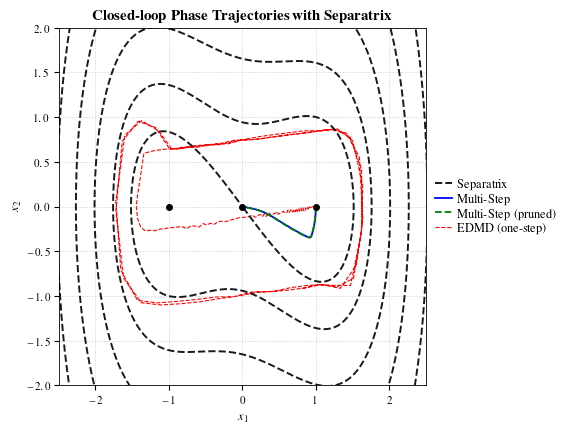

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# =========================
# Duffing params (for separatrix only; u=0)
# =========================
delta = 0.2
alpha = -1.0
beta  = 1.0

def duffing_unforced(t, x):
    x1, x2 = x
    dx1 = x2
    dx2 = -delta*x2 - alpha*x1 - beta*(x1**3)   # u = 0
    return [dx1, dx2]

def compute_separatrix_backward(delta=0.2, alpha=-1.0, beta=1.0, eps=1e-6, T=20.0, N=4000):
    A = np.array([[0.0, 1.0],
                  [-alpha, -delta]])      # = [[0,1],[1,-0.2]] for your params
    eigvals, eigvecs = np.linalg.eig(A)
    stable_idx = np.argmin(np.real(eigvals))  # negative eigenvalue
    v = np.real(eigvecs[:, stable_idx])
    v /= np.linalg.norm(v)

    def duffing_unforced(t, x):
        x1, x2 = x
        return [x2, -delta*x2 - alpha*x1 - beta*x1**3]

    # integrate BACKWARD in time
    t_eval = np.linspace(0.0, -T, N)

    def integ(x0):
        sol = solve_ivp(duffing_unforced, (0.0, -T), x0, t_eval=t_eval, rtol=1e-9, atol=1e-12)
        X = sol.y.T
        return X[::-1]  # reverse so time runs left-to-right in the plot

    sep_plus  = integ(+eps * v)
    sep_minus = integ(-eps * v)
    return sep_plus, sep_minus




def compute_separatrix(delta=0.2, alpha=-1.0, beta=1.0, eps=1e-6, T=80.0, N=8000):
    # Linearization at origin: xdot = A x
    A = np.array([[0.0, 1.0],
                  [-alpha, -delta]])

    eigvals, eigvecs = np.linalg.eig(A)
    stable_idx = np.argmin(np.real(eigvals))  # eigenvalue with most negative real part
    v = np.real(eigvecs[:, stable_idx])
    v = v / np.linalg.norm(v)

    t_eval = np.linspace(0.0, T, N)

    def integ(x0):
        sol = solve_ivp(
            lambda t, x: duffing_unforced(t, x),
            (0.0, T),
            x0,
            t_eval=t_eval,
            rtol=1e-9,
            atol=1e-12
        )
        return sol.y.T  # (N,2)

    sep_plus  = integ(+eps * v)
    sep_minus = integ(-eps * v)
    return sep_plus, sep_minus

# =========================
# Your closed-loop trajectories (assumed shapes like (T,1,2))
# =========================
X_mpc    = trajectory[:, 0, :]         # (T,2)
X_pruned = trajectory_pruned[:, 0, :]
X_single = trajectory_single[:, 0, :]

# =========================
# Compute separatrix
# =========================
sep_plus, sep_minus = compute_separatrix_backward(delta, alpha, beta, eps=1e-6, T=40.0, N=8000)

# =========================
# Plot: closed-loop + separatrix
# =========================
fig, ax = plt.subplots(1, 1, figsize=(5.8, 4.4))

# separatrix first (so trajectories sit on top)
ax.plot(sep_plus[:,0],  sep_plus[:,1], 'k--', lw=1.4, alpha=0.9, label="Separatrix")
ax.plot(sep_minus[:,0], sep_minus[:,1], 'k--', lw=1.4, alpha=0.9)

# closed-loop trajectories
ax.plot(X_mpc[:,0],    X_mpc[:,1],    'b-',  lw=1.3, label="Multi-Step")
ax.plot(X_pruned[:,0], X_pruned[:,1], 'g--', lw=1.3, label="Multi-Step (pruned)")

# single-step: visible but not dominating
ds_bad = 10
ax.plot(X_single[::ds_bad,0], X_single[::ds_bad,1],'r--', lw=0.8, label='EDMD (one-step)', zorder=1)
# equilibrium points (optional but nice)
ax.plot([-1, 0, 1], [0, 0, 0], 'ko', ms=4)

ax.set_title(r"\textbf{Closed-loop Phase Trajectories with Separatrix}")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.grid(True, linestyle="--", linewidth=0.4, alpha=0.6)
ax.legend(
    loc="center left",
    bbox_to_anchor=(1.01, 0.5),
    frameon=False,
    fontsize=9,
    handlelength=1.4,
    handletextpad=0.4,
    labelspacing=0.25,
    borderaxespad=0.0
)

# optional: auto-fit limits around your data
allX = np.vstack([X_mpc, X_pruned, X_single])
padx = 0.15 * (allX[:,0].max() - allX[:,0].min() + 1e-12)
pady = 0.15 * (allX[:,1].max() - allX[:,1].min() + 1e-12)
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.0,2.0)

plt.tight_layout()


plt.savefig("Figures/duffing_mpc_phase_portrait_with_separatrix.eps",
            format="eps", bbox_inches="tight", dpi=300)

plt.show()